In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing



In [ ]:
# Load the California Housing dataset as a DataFrame
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Print the shape of the dataset
print("\nDataset shape:", df.shape)

# Check for missing values in the dataset
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset shape: (20640, 9)

Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0

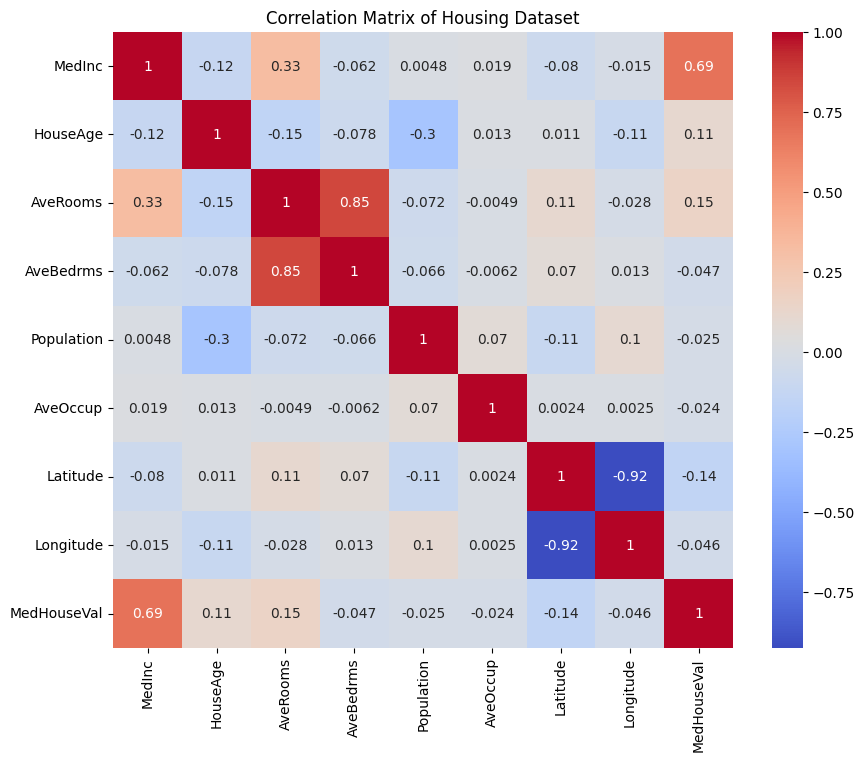

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)

# Display summary statistics
print("Summary Statistics:")
print(df.describe())

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Housing Dataset")
plt.show()

First 5 rows of scaled features:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


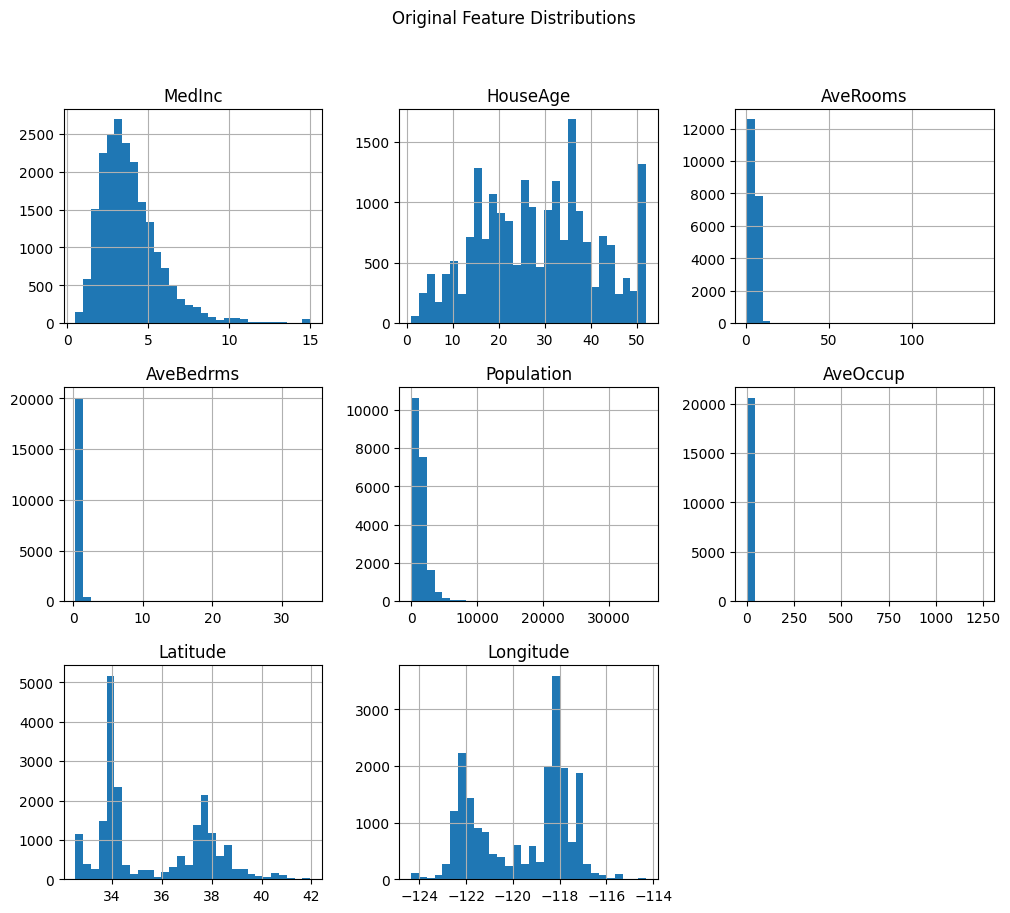

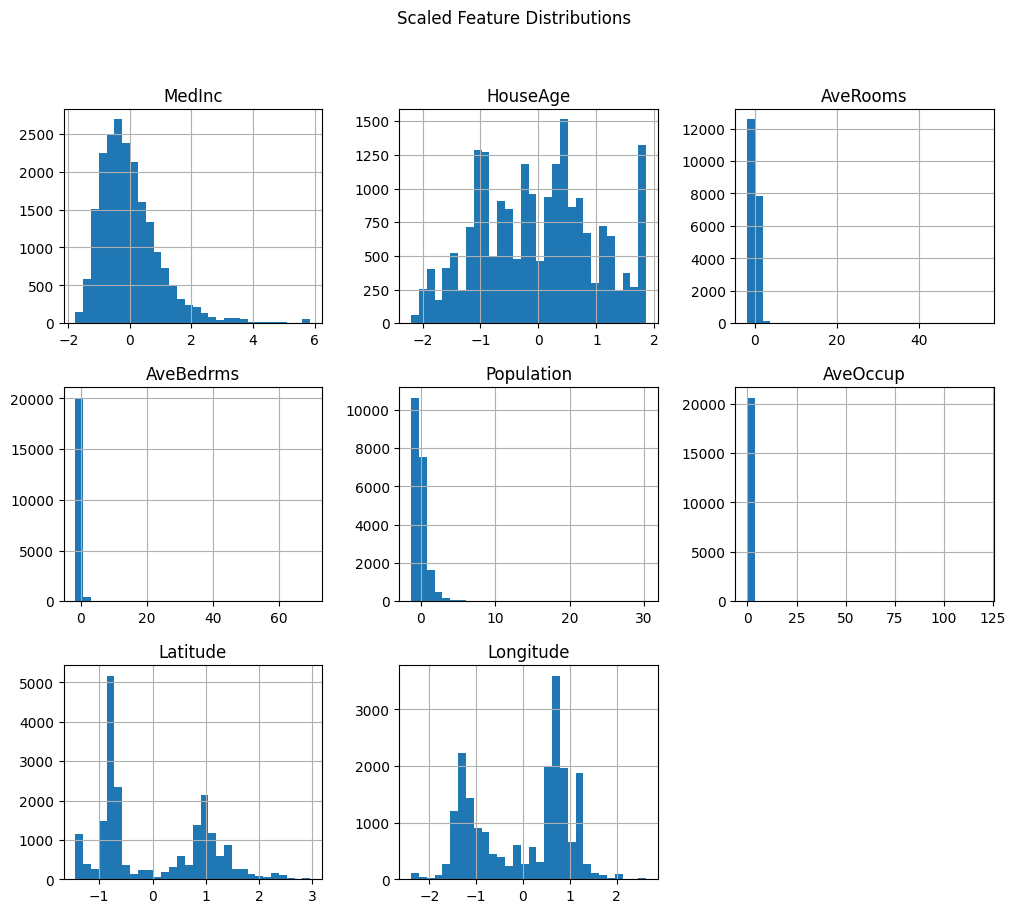

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Initialize the StandardScaler and scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the first few rows of the scaled features
print("First 5 rows of scaled features:")
print(X_scaled.head())

# Plot histograms for original features
X.hist(bins=30, figsize=(12, 10))
plt.suptitle("Original Feature Distributions")
plt.show()

# Plot histograms for scaled features
X_scaled.hist(bins=30, figsize=(12, 10))
plt.suptitle("Scaled Feature Distributions")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split the scaled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model with 100 trees for a baseline
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R2 Score: {r2:.3f}")

Random Forest Regressor Performance:
RMSE: 0.505
MAE: 0.328
R2 Score: 0.805


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Retrieve the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set with the tuned model
y_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model performance
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nTuned Random Forest Regressor Performance:")
print(f"RMSE: {rmse_tuned:.3f}")
print(f"MAE: {mae_tuned:.3f}")
print(f"R2 Score: {r2_tuned:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best Hyperparameters:
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}

Tuned Random Forest Regressor Performance:
RMSE: 0.494
MAE: 0.327
R2 Score: 0.814


In [ ]:
import joblib

# Save the best model to a file
model_filename = "tuned_rf_model.joblib"
joblib.dump(best_rf_model, model_filename)
print(f"Model saved as '{model_filename}'.")


Model saved as 'tuned_rf_model.joblib'.


In [10]:
from google.colab import files

# Download the saved model file
files.download('tuned_rf_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>